### In this notebook, I use Spark SQL and Python for big data analysis on Seattle crime data. (https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5).

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statistics as st
from datetime import datetime

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
# Load data from Seattle Police Website
import urllib.request
#urllib.request.urlretrieve("https://data.seattle.gov/api/views/tazs-3rd5/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
#dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sea.csv")
#display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))


path,name,size
dbfs:/laioffer/spark_hw1/data/sea.csv,sea.csv,196115999
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,550945238


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sea.csv"
# use this file name later

### Solve  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis or DS)

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
#display(df_opt1)
df_opt1.createOrReplaceTempView("sea_crime")

Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
2020-044620,12605873663,02/05/2020 10:10:00 AM,null,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385973723,47.64938723
2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399063,47.67511789
2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.29955218,47.66638407
2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384864805,47.64292734
2020-044076,12605081469,02/05/2020 12:51:21 AM,null,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195342,47.66219308
2020-044142,12605077150,02/04/2020 10:59:00 PM,null,02/05/2020 12:45:08 AM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M1,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE,-122.338449515,47.60878866
2020-044104,12605029468,02/04/2020 08:30:00 PM,02/04/2020 08:45:00 PM,02/04/2020 11:31:52 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309065,47.68052695
2020-043988,12604995759,02/04/2020 07:58:00 PM,null,02/04/2020 10:46:19 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,SW,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS,26XX BLOCK OF SW BARTON ST,-122.367311993,47.52102758
2020-043928,12604963106,02/04/2020 07:01:00 PM,null,02/04/2020 09:59:07 PM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,L,L2,NORTHGATE,15TH AVE NE / NE 95TH ST,-122.312077769,47.69761617
2020-044065,12605008517,02/04/2020 09:00:00 PM,02/04/2020 09:15:00 PM,02/04/2020 09:47:32 PM,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,E,E2,CAPITOL HILL,15XX BLOCK OF 12TH AVE,-122.316845012,47.61468385


In [0]:
print("Shape of date: ",(df_opt1.count(), len(df_opt1.columns)))

Shape of date: (921935, 17)

#### Problem 0:  Visualize the distribution of all the incidents using the longitude and latitude information

In [0]:
plot_df = df_opt1.toPandas()
plot_df['Longitude']=plot_df['Longitude'].astype(float)
plot_df['Latitude']=plot_df['Latitude'].astype(float)

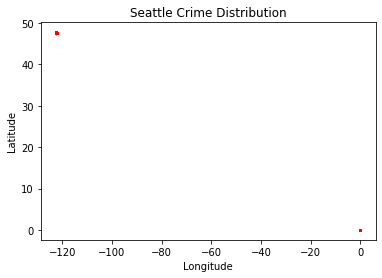

In [0]:
fig = plt.figure()
plt.title('Seattle Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(plot_df['Longitude'], plot_df['Latitude'], s = 0.5, c = 'r')
plt.show()

In [0]:
#Remove point at (0,0). This is obviously a mistake made by the police department. Let's just remove this data point for better visualization.
plot_df_new=plot_df[plot_df['Longitude']!=0]

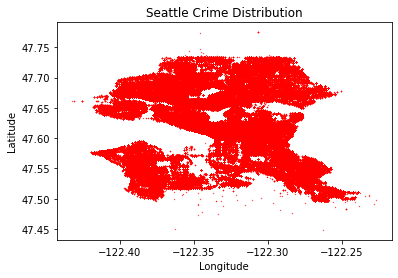

In [0]:
fig = plt.figure()
plt.title('Seattle Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(plot_df_new['Longitude'], plot_df_new['Latitude'], s = 0.1, c = 'r')
plt.show()

#### Problem 1: Count the number of crimes for different category (OLAP):

In [0]:
# Count number of crimes by different offense parent groups
offense_group_cate = df_opt1.groupBy('Offense Parent Group').count().orderBy('count', ascending=False)
offense_group_cate.show()

+--------------------+------+
Offense Parent Group| count|
+--------------------+------+
 LARCENY-THEFT|343641|
 ASSAULT OFFENSES|131661|
BURGLARY/BREAKING...|102694|
DESTRUCTION/DAMAG...| 84822|
 MOTOR VEHICLE THEFT| 55600|
 FRAUD OFFENSES| 54856|
TRESPASS OF REAL ...| 29089|
DRUG/NARCOTIC OFF...| 26816|
 ROBBERY| 21377|
DRIVING UNDER THE...| 16503|
FAMILY OFFENSES, ...| 10199|
WEAPON LAW VIOLAT...| 8685|
 BAD CHECKS| 6621|
 SEX OFFENSES| 5682|
STOLEN PROPERTY O...| 5205|
COUNTERFEITING/FO...| 4909|
PROSTITUTION OFFE...| 3989|
LIQUOR LAW VIOLAT...| 2308|
 EMBEZZLEMENT| 1916|
 ARSON| 1566|
+--------------------+------+
only showing top 20 rows

In [0]:
# Select offense parent groups that counts are greater than 20000
offense_group_cate=offense_group_cate.filter(offense_group_cate['count']>20000)
offense_df=offense_group_cate.toPandas()
offense_df

,Offense Parent Group,count
0,LARCENY-THEFT,343641
1,ASSAULT OFFENSES,131661
2,BURGLARY/BREAKING&ENTERING,102694
3,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,84822
4,MOTOR VEHICLE THEFT,55600
5,FRAUD OFFENSES,54856
6,TRESPASS OF REAL PROPERTY,29089
7,DRUG/NARCOTIC OFFENSES,26816
8,ROBBERY,21377


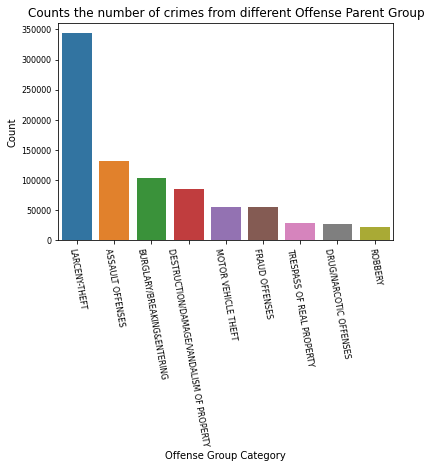

In [0]:
# Create Histogram using seaborn
bar, ax0 = plt.subplots()
ax0=sns.barplot(x='Offense Parent Group',y='count',data=offense_df)
ax0.set_title('Counts the number of crimes from different Offense Parent Group')
ax0.set_xlabel('Offense Group Category')
plt.xticks(rotation=-80)
ax0.set_ylabel('Count')
plt.tick_params(labelsize=8)
#display(bar)

In [0]:
# Count number of crimes in different crime against category
crime_against_cate = df_opt1.groupBy('Crime Against Category').count().orderBy('count', ascending=False)
crime_df=crime_against_cate.toPandas()
crime_df

,Crime Against Category,count
0,PROPERTY,683916
1,PERSON,138918
2,SOCIETY,99074
3,NOT_A_CRIME,27


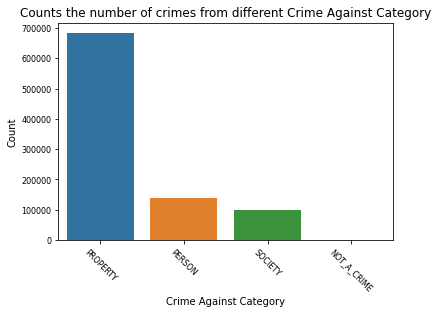

In [0]:
# Create Histogram using seaborn
bar, ax0 = plt.subplots()
ax0=sns.barplot(x='Crime Against Category',y='count',data=crime_df)
ax0.set_title('Counts the number of crimes from different Crime Against Category')
ax0.set_xlabel('Crime Against Category')
plt.xticks(rotation=-45)
ax0.set_ylabel('Count')
plt.tick_params(labelsize=8)
#display(bar)

#### Problem 2: Count the number of crimes for different block address, and visualize results (OLAP)

In [0]:
# Split safe and dangerous area
address_df_danger = df_opt1.groupBy('100 Block Address').count().orderBy('count', ascending=False)
address_df_danger_1 = address_df_danger.filter(address_df_danger['count']>2500)
address_df_safe = address_df_danger.filter(address_df_danger['count']<10)

# convert files to Pandas
danger_ad=address_df_danger_1.toPandas()

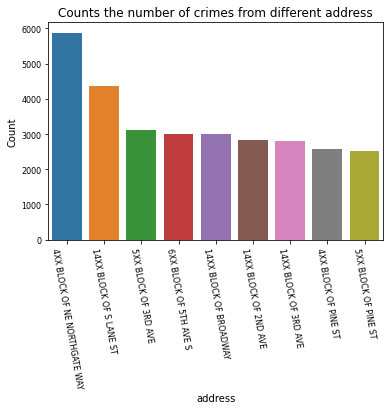

In [0]:
# Create Histogram using seaborn
bar, ax0 = plt.subplots()
ax0=sns.barplot(x='100 Block Address',y='count',data=danger_ad)
ax0.set_title('Counts the number of crimes from different address')
ax0.set_xlabel('address')
plt.xticks(rotation=-80)
ax0.set_ylabel('Count')
plt.tick_params(labelsize=8)
#display(bar)

#### Problem 3: Count the number of crimes each Sunday at Seattle downtown (OLAP)

In [0]:
# Covert to pandas
df_sun=df_opt1.toPandas()

In [0]:
# Convert Date Time to weekday and only keep data on Sunday
df_sun['DateTime'] = pd.to_datetime(df_sun['Offense Start DateTime'],errors="ignore")
df_sun['weekday'] = df_sun['DateTime'].dt.day_name()
df_sun=df_sun[df_sun['weekday']=="Sunday"]

In [0]:
# Remove Duplicate
df_sun=df_sun.drop_duplicates()
# Date Shape and count(column)
print("Total number of crimes each Sunday at Seattle downtown",df_sun.shape[0])

Total number of crimes each Sunday at Seattle downtown 124118

In [0]:
# Select the area in Seattle downtown
# Seattle Latitude and longitude coordinates are: 47.6050° N, 122.3344° W 
# X and Y represents each. So we assume Seattle downtown spacial range: X (-122.32,-122.34), Y(47.59,47.61)
df_sun['Latitude']=df_sun['Latitude'].astype(float)
df_sun['Longitude']=df_sun['Longitude'].astype(float)
df_sun=df_sun[(df_sun['Longitude']<=-122.32) & (df_sun['Longitude']>=-122.34)]
df_sun=df_sun[(df_sun['Latitude']>=47.59) & (df_sun['Latitude']<=47.61)]

In [0]:
df_sun.head()

Out[18]:

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,DateTime,weekday
55,2020-031973,12603378761,01/26/2020 07:00:00 AM,01/26/2020 08:00:00 PM,02/03/2020 08:04:33 PM,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,W,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,8XX BLOCK OF S WELLER ST,-122.322052,47.597508,2020-01-26 07:00:00,Sunday
67,2020-042262,12603229695,01/26/2020 12:00:00 AM,01/30/2020 11:59:00 PM,02/03/2020 05:12:23 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,W,K,K2,PIONEER SQUARE,2XX BLOCK OF OCCIDENTAL AVE S,-122.332878,47.600474,2020-01-26 00:00:00,Sunday
118,2020-901654,12602590662,02/02/2020 03:30:00 PM,02/02/2020 07:30:00 PM,02/03/2020 10:22:23 AM,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,W,M,M3,DOWNTOWN COMMERCIAL,2XX BLOCK OF PIKE ST,-122.338348,47.609517,2020-02-02 15:30:00,Sunday
179,2020-040917,12601677586,02/02/2020 01:39:10 PM,None,02/02/2020 03:04:53 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,3XX BLOCK OF 4TH AVE S,-122.328966,47.599616,2020-02-02 13:39:10,Sunday
518,2020-031298,12478838396,01/26/2020 02:21:00 AM,01/26/2020 07:16:00 AM,01/29/2020 03:53:07 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,1XX BLOCK OF 6TH AVE S,-122.326352,47.601290,2020-01-26 02:21:00,Sunday


In [0]:
#Ignore Tiem and only keep date
df_sun['JustDate']=df_sun['DateTime'].dt.date
sun_crime=df_sun.groupby(["JustDate"]).size().reset_index(name='count')

In [0]:
print('Average crimes on Sunday in downtown Seattle:', st.mean(sun_crime['count']))

Average crimes on Sunday in downtown Seattle: 16.55124653739612

In [0]:
# Dangerous Areas on Sunday in Downtown Seattle
crime_area=df_sun.groupby(["MCPP"]).size().reset_index(name='count')
crime_area=crime_area.sort_values('count', ascending=False)[crime_area['count']>1000]
crime_area

<command-1124088892174616>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 crime_area=crime_area.sort_values('count', ascending=False)[crime_area['count']>1000]

,MCPP,count
4,DOWNTOWN COMMERCIAL,5328
7,PIONEER SQUARE,2590
3,CHINATOWN/INTERNATIONAL DISTRICT,2066
5,FIRST HILL,1767


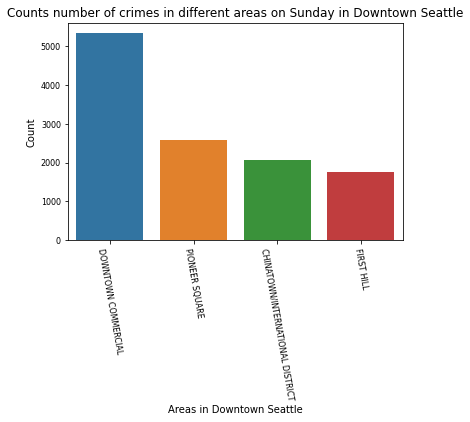

In [0]:
# Create Histogram for dangerous areas in Downtown Seattle using seaborn
bar, ax0 = plt.subplots()
ax0=sns.barplot(x='MCPP',y='count',data=crime_area)
ax0.set_title('Counts number of crimes in different areas on Sunday in Downtown Seattle')
ax0.set_xlabel('Areas in Downtown Seattle')
plt.xticks(rotation=-80)
ax0.set_ylabel('Count')
plt.tick_params(labelsize=8)
#display(bar)

In [0]:
# Average crimes in different areas on Sunday in Downtown Seattle
crime_area_avg=df_sun.groupby(['MCPP','JustDate']).size().reset_index(name='count')
crime_area_avg=crime_area_avg.groupby(['MCPP']).agg({'count': ['mean']})
mean= pd.MultiIndex.from_product([['count'],['mean']])
# Select areas Avg crimes greater than 1.5
crime_area_avg=crime_area_avg[crime_area_avg[mean]>1.5]
# Drop Nah
crime_area_avg=crime_area_avg.dropna()
# Sort by count
crime_area_avg=crime_area_avg.sort_values([('count', 'mean')], ascending=False)

In [0]:
print('Averge Crimes in different areas on Sunday in Downtown Seattle')
crime_area_avg

Averge Crimes in different areas on Sunday in Downtown Seattle

,count
,mean
MCPP,
DOWNTOWN COMMERCIAL,7.430962
PIONEER SQUARE,3.948171
CHINATOWN/INTERNATIONAL DISTRICT,3.274168
FIRST HILL,2.813694
CENTRAL AREA/SQUIRE PARK,2.000000


#### Problem 4: Analyze the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results (OLAP)

In [0]:
# Covert to pandas
month_df=df_opt1.toPandas()

In [0]:
# Only keep data between 2015 and 2018
month_df['DateTime'] = pd.to_datetime(month_df['Offense Start DateTime'],errors="ignore")
month_df['year'] = month_df['DateTime'].dt.year
month_df=month_df[(month_df['year']<2019) & (month_df["year"]>2014)]


In [0]:
# Set index to date as format YYYY-MM and count the number of crime group by date
per=pd.DatetimeIndex(month_df['Offense Start DateTime']).to_period("M")
monthly_date=month_df.groupby(per).size().reset_index(name='count')

Text(0, 0.5, 'Count')

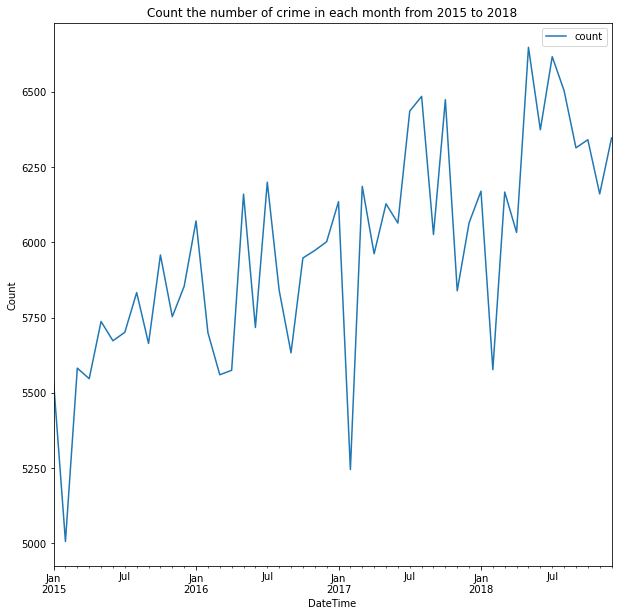

In [0]:
# Create a plot to find trend line of crimes each month from 2015 to 2018
ax=monthly_date.plot(x="Offense Start DateTime", y="count",figsize=(10,10), title='Count the number of crime in each month from 2015 to 2018')
ax.set_xlabel("DateTime")
ax.set_ylabel("Count")

From 2015 to 2018, the number of crime in each month is constantly increasing. There are unexpected drops in each January from 2015 to 2018. Maybe due to some new policies created in the beginning of each year and everyone stay with their family.

#### Problem 5: Analyze the number of crime with respect to the hour in certian day to give your travel suggestion to visit Seattle (OLAP)

In [0]:
christmas=df_opt1.toPandas()
# First select Christmas day of 2018, 2019, 2020
christmas['DateTime'] = pd.to_datetime(christmas['Offense Start DateTime'],errors="ignore")
christmas['date'] = christmas['DateTime'].dt.date

In [0]:
import datetime
christmas_date=christmas[ (christmas['date']==datetime.date(2018,12,25)) | (christmas['date']==datetime.date(2019,12,25)) | (christmas['date']==datetime.date(2020,12,25))]

In [0]:
christmas_exp=christmas_date.groupby(['date']).size().reset_index(name='count')
christmas_exp

,date,count
0,2018-12-25,163
1,2019-12-25,143
2,2020-12-25,159


In [0]:
# Compare regular day and christmas day
normal=christmas.groupby(['date']).size().reset_index(name='count')
print('Average crimes of each day is', sum(normal['count'])/normal.shape[0])
print('Average crimes of christmas day in 2018, 2019, and 2020 is', sum(christmas_exp['count'])/christmas_exp.shape[0])
if sum(normal['count'])/normal.shape[0]+20<sum(christmas_exp['count'])/christmas_exp.shape[0]:
  print("Average crimes of christmas is much greater than normal. Don't come to Seattle in Christmas day!")
else:
  print("Average crimes of christmas is almost same as normal or even less than normal. Enjoy your Christmas day in Seattle! Have fun!!")

Average crimes of each day is 162.1092925026399
Average crimes of christmas day in 2018, 2019, and 2020 is 155.0
Average crimes of christmas is almost same as normal or even less than normal. Enjoy your Christmas day in Seattle! Have fun!!

In [0]:
# Independence Day July 4th of 2018, 2019, and 2020
ind_date=christmas[ (christmas['date']==datetime.date(2018,7,4)) | (christmas['date']==datetime.date(2019,7,4)) | (christmas['date']==datetime.date(2020,7,4))]

In [0]:
ind_exp=ind_date.groupby(['date']).size().reset_index(name='count')
ind_exp

,date,count
0,2018-07-04,235
1,2019-07-04,191
2,2020-07-04,184


In [0]:
print('Average crimes of each day is', sum(normal['count'])/normal.shape[0])
print('Average crimes of Independence day in 2018, 2019, and 2020 is', sum(ind_exp['count'])/ind_exp.shape[0])
if sum(normal['count'])/normal.shape[0]+20<sum(ind_exp['count'])/ind_exp.shape[0]:
  print("Average crimes of July 4th is much greater than normal. Don't come to Seattle in Independence day!")
else:
  print("Average crimes of July 4th is almost same as normal or even less than normal. Enjoy your Independence day in Seattle! Have fun!!")

Average crimes of each day is 162.1092925026399
Average crimes of Independence day in 2018, 2019, and 2020 is 203.33333333333334
Average crimes of July 4th is much greater than normal. Don't come to Seattle in Independence day!

In [0]:
# Thanksgiving of 2018, 2019, and 2020
# Independence Day July 4th of 2018, 2019, and 2020
thx_date=christmas[ (christmas['date']==datetime.date(2018,11,22)) | (christmas['date']==datetime.date(2019,11,28)) | (christmas['date']==datetime.date(2020,11,26))]

In [0]:
thx_date=thx_date.groupby(['date']).size().reset_index(name='count')
thx_date

,date,count
0,2018-11-22,188
1,2019-11-28,144
2,2020-11-26,178


In [0]:
print('Average crimes of each day is', sum(normal['count'])/normal.shape[0])
print('Average crimes of Thanksgiving day in 2018, 2019, and 2020 is', sum(thx_date['count'])/thx_date.shape[0])
if sum(normal['count'])/normal.shape[0]+20<sum(thx_date['count'])/thx_date.shape[0]:
  print("Average crimes of Thanksgiving day is much greater than normal. Don't come to Seattle in Thanksgiving day!")
else:
  print("Average crimes of Thanksgiving day is almost same as normal or even less than normal. Enjoy your Thanksgiving day in Seattle! Have fun!!")

Average crimes of each day is 162.1092925026399
Average crimes of Thanksgiving day in 2018, 2019, and 2020 is 170.0
Average crimes of Thanksgiving day is almost same as normal or even less than normal. Enjoy your Thanksgiving day in Seattle! Have fun!!

#### Problem 6: (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: Find out the crime category and time (hour) from the result of step 1  
(3) Step3: Give advice to distribute the police based on analysis results.

##### Step 1: Find top-3 danger district

In [0]:
top_3=spark.sql('select mcpp, count(*) as count_happen from sea_crime group by 1 order by 2 desc limit 3 ')
top_3_all=spark.sql('select * from sea_crime where mcpp in (select mcpp from(select mcpp, count(*) as count_happen from sea_crime group by 1 order by 2 desc limit 3) as top_3)')

In [0]:
top_3.show()

+-------------------+------------+
 mcpp|count_happen|
+-------------------+------------+
DOWNTOWN COMMERCIAL| 77447|
 CAPITOL HILL| 56063|
 NORTHGATE| 52372|
+-------------------+------------+

##### Step 2: Find out the crime category and time (hour) from the result of step 1

In [0]:
# Step 2: Find out the crime category and time (hour) from the result of step 1 
top_3_all=top_3_all.toPandas()
top_3_all['DateTime'] = pd.to_datetime(top_3_all['Offense Start DateTime'],errors="ignore")
top_3_all['hour'] = top_3_all['DateTime'].dt.hour

In [0]:
top3_data=top_3_all.groupby(['MCPP','Crime Against Category','hour']).size().reset_index(name='count')
top3_data=top3_data[top3_data['Crime Against Category']!='NOT_A_CRIME']

In [0]:
# Top 1: DOWNTOWN COMMERCIAL
downtown=top3_data[top3_data['MCPP']=='DOWNTOWN COMMERCIAL']
downtown_person=downtown[downtown['Crime Against Category']=='PERSON']
downtown_person['hour']=downtown_person['hour'].astype(int)
downtown_pro=downtown[downtown['Crime Against Category']=='PROPERTY']
downtown_pro['hour']=downtown_pro['hour'].astype(int)
downtown_soc=downtown[downtown['Crime Against Category']=='SOCIETY']
downtown_soc['hour']=downtown_soc['hour'].astype(int)

<matplotlib.axes._subplots.AxesSubplot at 0x7f812d73bfa0>

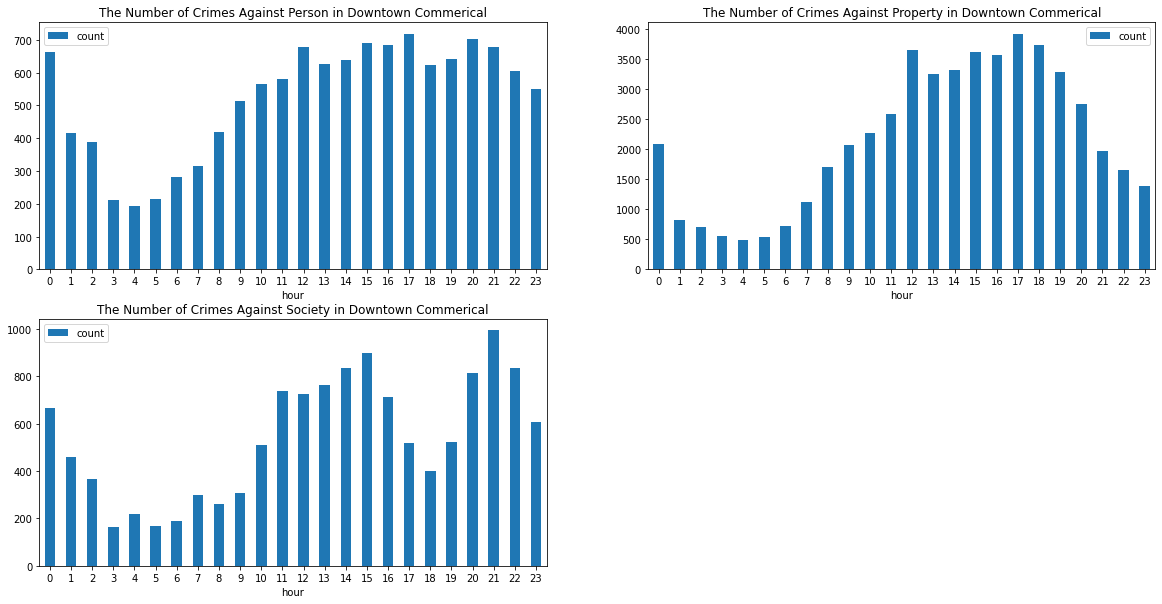

In [0]:
# Plot 3 different crimes against category in downtown commerical area
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
downtown_person.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Person in Downtown Commerical",ax=plt.gca()) 
plt.subplot(2,2,2)
downtown_pro.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Property in Downtown Commerical",ax=plt.gca())
plt.subplot(2,2,3)
downtown_soc.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Society in Downtown Commerical",ax=plt.gca())

In [0]:
# Top 2: CAPITOL HILL
capitol=top3_data[top3_data['MCPP']=='CAPITOL HILL']
capitol_person=capitol[capitol['Crime Against Category']=='PERSON']
capitol_person['hour']=capitol_person['hour'].astype(int)
capitol_pro=capitol[capitol['Crime Against Category']=='PROPERTY']
capitol_pro['hour']=capitol_pro['hour'].astype(int)
capitol_soc=capitol[capitol['Crime Against Category']=='SOCIETY']
capitol_soc['hour']=capitol_soc['hour'].astype(int)

<command-1623210472388139>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 capitol_person['hour']=capitol_person['hour'].astype(int)
<command-1623210472388139>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 capitol_pro['hour']=capitol_pro['hour'].astype(int)
<command-1623210472388139>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 capitol_soc['hour']=capitol_soc['hour'].astype(int)

<matplotlib.axes._subplots.AxesSubplot at 0x7f812d562a90>

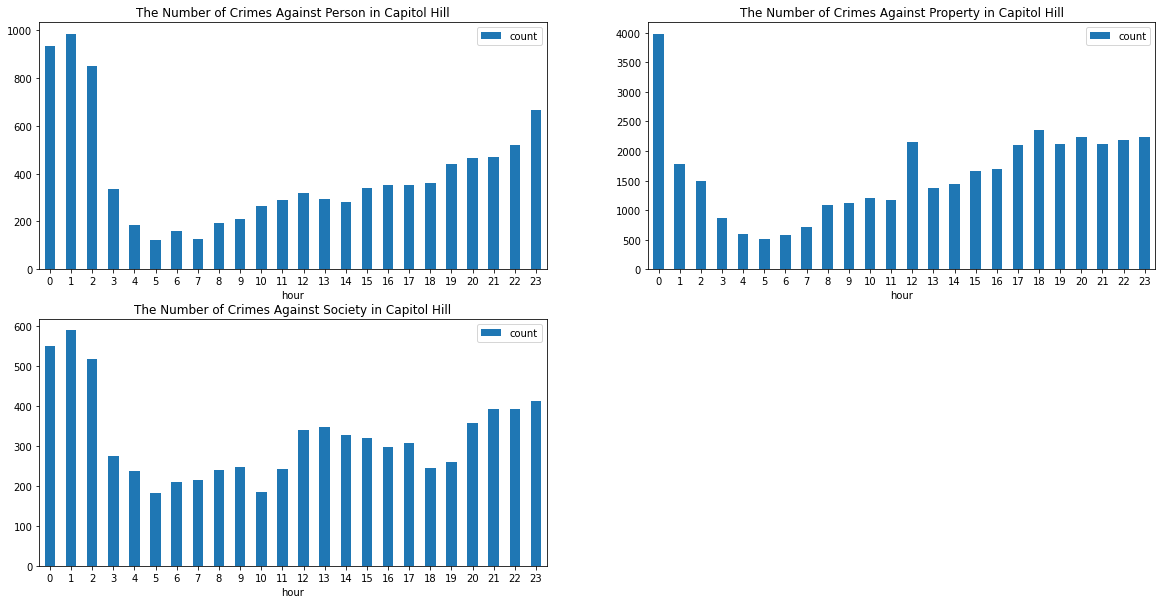

In [0]:
# Plot 3 different crimes against category in Capitol Hill area
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
capitol_person.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Person in Capitol Hill",ax=plt.gca()) 
plt.subplot(2,2,2)
capitol_pro.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Property in Capitol Hill",ax=plt.gca())
plt.subplot(2,2,3)
capitol_soc.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Society in Capitol Hill",ax=plt.gca())

In [0]:
# Top 3: NORTHGATE
north=top3_data[top3_data['MCPP']=='NORTHGATE']
north_person=north[north['Crime Against Category']=='PERSON']
north_person['hour']=north_person['hour'].astype(int)
north_pro=north[north['Crime Against Category']=='PROPERTY']
north_pro['hour']=north_pro['hour'].astype(int)
north_soc=north[north['Crime Against Category']=='SOCIETY']
north_soc['hour']=north_soc['hour'].astype(int)

<command-3766598863781523>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 north_person['hour']=north_person['hour'].astype(int)
<command-3766598863781523>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 north_pro['hour']=north_pro['hour'].astype(int)
<command-3766598863781523>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 north_soc['hour']=north_soc['hour'].astype(int)

<matplotlib.axes._subplots.AxesSubplot at 0x7f812d208640>

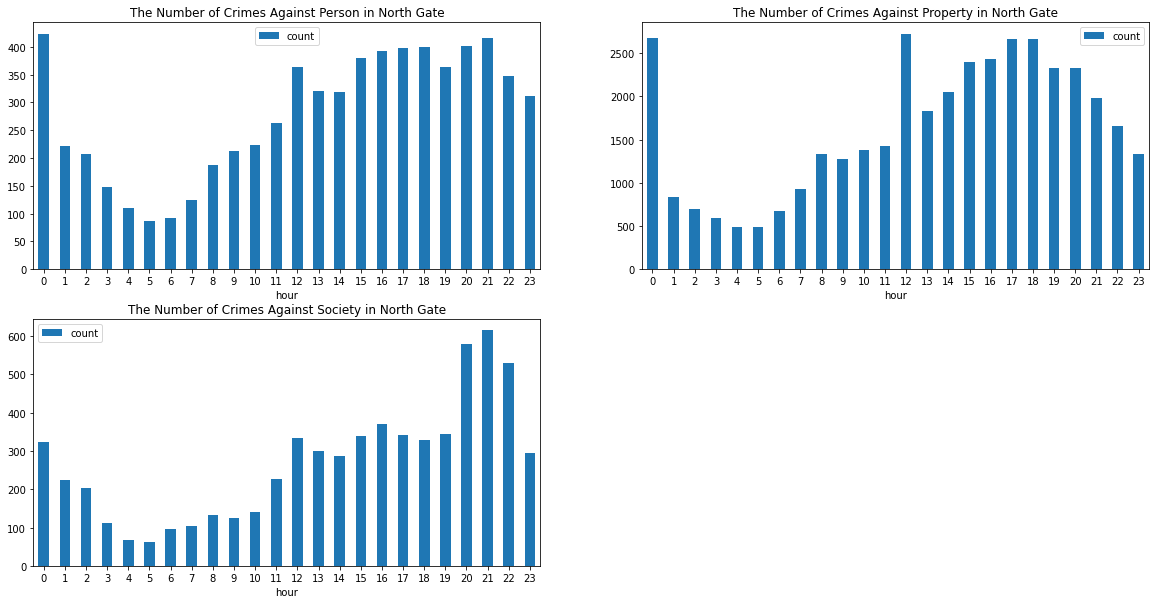

In [0]:
# Plot 3 different crimes against category in North Gate area
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
north_person.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Person in North Gate",ax=plt.gca()) 
plt.subplot(2,2,2)
north_pro.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Property in North Gate",ax=plt.gca())
plt.subplot(2,2,3)
north_soc.plot.bar(x='hour', y='count', rot=0, title="The Number of Crimes Against Society in North Gate",ax=plt.gca())

In downtown commerical area, crimes against person keep in a high rate from noon to midnight and lower than normal at 3-6 am. The lowest rate of crimes against property is 4 am. After 4 am, the rate keep increasing to 18 pm when the rate approach the top then decreasing. The crimes against society from 10 am to 5 pm and from 8 pm to 12 am is extremely higher than normal. 

In Capitol Hill, crimes against person keep in a high rate in midnight. The highest rate of crimes against property is in midnight. The crimes against society in midnight is extremely higher than normal. 

In NorthGate, crimes against person and property keep in a high rate all day expect morning. Crimes against society are only higher in the evening from 8-10 pm.

##### Step3: Give advice to distribute the police based on your analysis results

For Downtown Commerical area, more polices needed from noon to midnight.

For Capitol Hill, more polices needed at midnight.

For NorthGate, more polices needed from 6 pm to midnight.

### Conclusion

In this Seattle Crime Data analysis, I generated insight from data in Seattle Police Website which including offense start datetime, offense group, crime against group, and longitude and latitude to help us identify the specific place in Seattle by using Spark, Spark SQL, and Pandas. In the process of data visualization, I used python package Matplotlib and Seaborn. In this project, I realized that the speed of loading dataset and data manipulation using Spark is much faster than using Python Pandas.     

Based on what I discover in this dataset, the most crime offense group is theft which is more than 300 thousand, and the most crime against category is property. Based on latitude and longitude, I can identify the area of downtown Seattle. In downtown Seattle, downtown commercial area and pioneer square are the top 2 places of average Crimes on Sunday. The following place is in Chinatown. This very makes sense because I have been there several times. Also, capitol hill and northgate are very dangerous place. If you visit Seattle, you'd better to skip capitol hill and northgate since no famous places in these two dangerous area.